<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/k_Nearest_Neighbors_with_Numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# k-Nearest Neighbors with Numpy

In [4]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

In [6]:
rand = np.random.RandomState(42)

In [8]:
X = rand.rand(10,2)
X

array([[0.61185289, 0.13949386],
       [0.29214465, 0.36636184],
       [0.45606998, 0.78517596],
       [0.19967378, 0.51423444],
       [0.59241457, 0.04645041],
       [0.60754485, 0.17052412],
       [0.06505159, 0.94888554],
       [0.96563203, 0.80839735],
       [0.30461377, 0.09767211],
       [0.68423303, 0.44015249]])

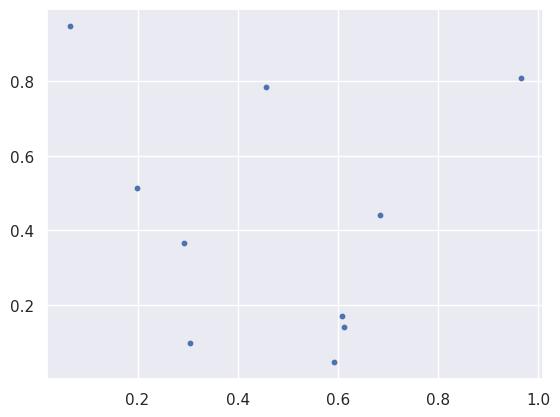

In [11]:
plt.scatter(X[:,0], X[:,1], s=10)

compute the distance between each pair of points

In [13]:
X[:, np.newaxis, :]

array([[[0.61185289, 0.13949386]],

       [[0.29214465, 0.36636184]],

       [[0.45606998, 0.78517596]],

       [[0.19967378, 0.51423444]],

       [[0.59241457, 0.04645041]],

       [[0.60754485, 0.17052412]],

       [[0.06505159, 0.94888554]],

       [[0.96563203, 0.80839735]],

       [[0.30461377, 0.09767211]],

       [[0.68423303, 0.44015249]]])

In [14]:
dist_sq = np.sum((X[:, np.newaxis, :] - X[np.newaxis, :, :])**2, axis=-1)

In [15]:
dist_sq

array([[0.00000000e+00, 1.53682444e-01, 4.41173690e-01, 3.10322121e-01,
        9.03493172e-03, 9.81436457e-04, 9.54106550e-01, 5.72591554e-01,
        9.61449388e-02, 9.56344971e-02],
       [1.53682444e-01, 0.00000000e+00, 2.02276781e-01, 3.04171655e-02,
        1.92505348e-01, 1.37829701e-01, 3.90905110e-01, 6.48980645e-01,
        7.23496496e-02, 1.59178356e-01],
       [4.41173690e-01, 2.02276781e-01, 0.00000000e+00, 1.39148321e-01,
        5.64305282e-01, 4.00741517e-01, 1.79696208e-01, 2.60192714e-01,
        4.95600525e-01, 1.71099567e-01],
       [3.10322121e-01, 3.04171655e-02, 1.39148321e-01, 0.00000000e+00,
        3.73067220e-01, 2.84495590e-01, 2.07044712e-01, 6.73223860e-01,
        1.84536571e-01, 2.40285796e-01],
       [9.03493172e-03, 1.92505348e-01, 5.64305282e-01, 3.73067220e-01,
        0.00000000e+00, 1.56232112e-02, 1.09250086e+00, 7.19854408e-01,
        8.54529630e-02, 1.63431958e-01],
       [9.81436457e-04, 1.37829701e-01, 4.00741517e-01, 2.84495590e-01,
   

In [16]:
nearest = np.argsort(dist_sq, axis=1)
print(nearest)

[[0 5 4 9 8 1 3 2 7 6]
 [1 3 8 5 0 9 4 2 6 7]
 [2 3 9 6 1 7 5 0 8 4]
 [3 1 2 8 6 9 5 0 4 7]
 [4 0 5 8 9 1 3 2 7 6]
 [5 0 4 9 8 1 3 2 7 6]
 [6 2 3 1 9 8 7 5 0 4]
 [7 9 2 5 0 1 3 4 6 8]
 [8 1 4 0 5 3 9 2 6 7]
 [9 5 0 1 4 2 7 3 8 6]]


In [17]:
K = 2
nearest_partition = np.argpartition(dist_sq, K + 1, axis=1)

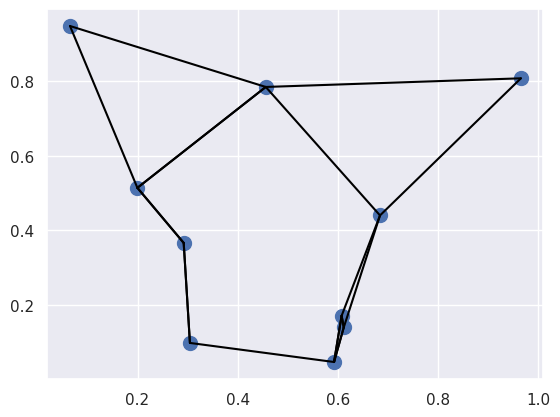

In [18]:
plt.scatter(X[:, 0], X[:, 1], s=100)

# draw lines from each point to its two nearest neighbors
K = 2

for i in range(X.shape[0]):
    for j in nearest_partition[i, :K+1]:
        # plot a line from X[i] to X[j]
        # use some zip magic to make it happen:
        plt.plot(*zip(X[j], X[i]), color='black')